# Batch Audio Feature Extraction Demo

How to extract features from a folder of audio files using the batch extractor, and how to analyze and visualize the results.

In [1]:
import os
import numpy as np
import pandas as pd
from AFX.batch_extractor import extract_features_from_folder
from AFX.utils.config_loader import load_config

# Set up paths
input_folder = os.environ.get('UrbanSound8K_dataset', 'example_audio_folder')
config_path = '../AFX/config.json'
output_path = 'batch_features.npy'

# Run batch extraction with extra options (this may take time for large folders)
extract_features_from_folder(
    input_folder,
    config_path,
    output_path,
    save_format='npy',
    features=['melspectrogram', 'mfcc'],
    aggregation='mean',
    normalize='zscore',
)

[1/8732] Processing 101415-3-0-2.wav
[2/8732] Processing 101415-3-0-3.wav
[3/8732] Processing 101415-3-0-8.wav
[4/8732] Processing 102106-3-0-0.wav
[5/8732] Processing 102305-6-0-0.wav
[6/8732] Processing 102842-3-0-1.wav
[7/8732] Processing 102842-3-1-0.wav
[8/8732] Processing 102842-3-1-5.wav
[9/8732] Processing 102842-3-1-6.wav
[10/8732] Processing 103074-7-0-0.wav
[11/8732] Processing 103074-7-0-1.wav
[12/8732] Processing 103074-7-0-2.wav
[13/8732] Processing 103074-7-1-0.wav
[14/8732] Processing 103074-7-1-1.wav
[15/8732] Processing 103074-7-1-2.wav
[16/8732] Processing 103074-7-1-3.wav
[17/8732] Processing 103074-7-1-4.wav
[18/8732] Processing 103074-7-1-5.wav
[19/8732] Processing 103074-7-1-6.wav
[20/8732] Processing 103074-7-2-0.wav
[21/8732] Processing 103074-7-3-0.wav
[22/8732] Processing 103074-7-3-1.wav
[23/8732] Processing 103074-7-3-2.wav
[24/8732] Processing 103074-7-3-3.wav
[25/8732] Processing 103074-7-4-0.wav
[26/8732] Processing 103074-7-4-1.wav
[27/8732] Processing 

In [13]:
# Load the extracted features
results = np.load(output_path, allow_pickle=True).item()

# Convert to DataFrame for analysis (ignore files with errors)
records = []
for fname, feats in results.items():
    if 'error' in feats:
        continue
    row = {'file': fname}
    # Store the entire array for each feature
    for k, v in feats.items():
        row[k] = v
    records.append(row)
df = pd.DataFrame(records)
df.head()

,file,melspectrogram,mfcc
0,101415-3-0-2.wav,"[-0.23826301526423083, -0.23799505578125993, -...","[-3.299095970639816, 1.2971296488160395, 0.367..."
1,101415-3-0-3.wav,"[-0.2433682847143399, -0.24309124741661775, -0...","[-3.1596178506582278, 1.5900615092728474, 0.46..."
2,101415-3-0-8.wav,"[-0.2136897380718165, -0.21278248815925818, -0...","[-3.359805974533845, 1.112558067664896, 0.2734..."
3,102106-3-0-0.wav,"[-0.33592851162520326, -0.3232470533862623, -0...","[-3.1735152784383236, 1.4950281603274025, -0.3..."
4,102305-6-0-0.wav,"[10.122740803897761, 3.6782751514172167, 1.440...","[-3.294248888487409, 1.3028022091529838, 0.418..."


## Visualize Feature Distributions
Let's plot the distribution of a few features across the dataset.

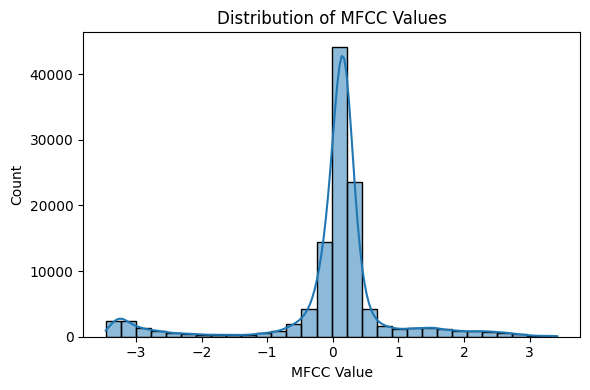

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten the list of MFCCs for all files into a single array for plotting
mfcc_values = np.concatenate(df['mfcc'].dropna().values)

plt.figure(figsize=(6, 4))
sns.histplot(mfcc_values, bins=30, kde=True)
plt.title("Distribution of MFCC Values")
plt.xlabel('MFCC Value')
plt.ylabel('Count')
plt.tight_layout()
plt.show()